In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,3)

In [2]:
class evaluation:
    def __init__(self, true_s):
        self.true_df = pd.DataFrame(true_s)
        self.true_df.columns = ['swell']
        self.true_df['swell(t+1)'] = self.true_df['swell'].shift(-1)
        self.true_df['swell(t+2)'] = self.true_df['swell'].shift(-2)
        self.true_df['swell(t-1)'] = self.true_df['swell'].shift(1)
        self.true_df['swell(t-2)'] = self.true_df['swell'].shift(2)
    
        self.swell_columns = ['swell(t+1)','swell(t+2)','swell(t-1)','swell(t-2)']
    
    def _eval_one(self, pred):
        true = self.true_df.loc[pred.name]
        swell = true['swell'] 
        p_swell = pred['pred']

        if swell == 0 and p_swell == 0:
            return 1

        if swell == 1 and p_swell == 1:
            return 2

        if swell == 0 and p_swell == 1:
            if (true[self.swell_columns].values == 1).any():
                return 0
            else:
                return -1

        if swell == 1 and p_swell == 0:
            if (pred[self.swell_columns].values == 1).any():
                return 0
            else: 
                return -2
    
    def evaluate(self, pred):
        pred_df = pd.DataFrame(pred)
        pred_df.columns = ['pred']
        pred_df['swell(t+1)'] = pred_df['pred'].shift(-1)
        pred_df['swell(t+2)'] = pred_df['pred'].shift(-2)
        pred_df['swell(t-1)'] = pred_df['pred'].shift(1)
        pred_df['swell(t-2)'] = pred_df['pred'].shift(2)

        result = []
        for index in pred_df.index:
            result.append(self._eval_one(pred_df.loc[index]))
        
        #print(result)
        print(pd.Series(result).value_counts())
        
        return np.sum(result)

In [3]:
num_values = 7
degrees_week = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_week)
sin_week = np.sin(np.deg2rad(degrees_week))
print(sin_week)
cos_week = np.cos(np.deg2rad(degrees_week))
print(cos_week)

num_values = 12
degrees_month = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_month)
sin_month = np.sin(np.deg2rad(degrees_month))
print(sin_month)
cos_month = np.cos(np.deg2rad(degrees_month))
print(cos_month)

num_values = 31
degrees_day = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_day)
sin_day = np.sin(np.deg2rad(degrees_day))
print(sin_day)
cos_day = np.cos(np.deg2rad(degrees_day))
print(cos_day)

num_values = 24
degrees_hour = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_hour)
sin_hour = np.sin(np.deg2rad(degrees_hour))
print(sin_hour)
cos_hour = np.cos(np.deg2rad(degrees_hour))
print(cos_hour)

[   0.           51.42857143  102.85714286  154.28571429  205.71428571
  257.14285714  308.57142857]
[ 0.          0.78183148  0.97492791  0.43388374 -0.43388374 -0.97492791
 -0.78183148]
[ 1.          0.6234898  -0.22252093 -0.90096887 -0.90096887 -0.22252093
  0.6234898 ]
[   0.   30.   60.   90.  120.  150.  180.  210.  240.  270.  300.  330.]
[  0.00000000e+00   5.00000000e-01   8.66025404e-01   1.00000000e+00
   8.66025404e-01   5.00000000e-01   1.22464680e-16  -5.00000000e-01
  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01  -5.00000000e-01]
[  1.00000000e+00   8.66025404e-01   5.00000000e-01   6.12323400e-17
  -5.00000000e-01  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01
  -5.00000000e-01  -1.83697020e-16   5.00000000e-01   8.66025404e-01]
[   0.           11.61290323   23.22580645   34.83870968   46.4516129
   58.06451613   69.67741935   81.29032258   92.90322581  104.51612903
  116.12903226  127.74193548  139.35483871  150.96774194  162.58064516
  174.19354839  185.806

In [4]:
def make_coord(date,num_class):
    # 1 ~ 12, 1 ~ 7, 1 ~ 31
    degrees = np.linspace(0,360,num_values + 1)[:-1]
    sin = np.sin(np.deg2rad(degrees))
    cos = np.cos(np.deg2rad(degrees))
    return sin, cos


def date2coord(date, sin, cos):
    return cos[date-1], sin[date-1]


def date2week(x):
    y = int(str(x)[:4])
    m = int(str(x)[4:6])
    d = int(str(x)[6:8])
    day = datetime(y, m, d)
    return day.weekday()

In [5]:
df = pd.read_csv('./merged_info_data.tsv',sep='\t',index_col='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 65 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [6]:
df['swell'].value_counts()

0.0    31800
1.0     2592
Name: swell, dtype: int64

In [7]:
df['swell'] = df['swell'] + df['weather_deterioration']

In [8]:
df['swell'].value_counts()

0.0    26863
1.0     4937
2.0     2592
Name: swell, dtype: int64

In [9]:
df['month'] = df['hour'].apply(lambda x:int(str(x)[4:6]))
df['day'] = df['hour'].apply(lambda x:int(str(x)[6:8]))
df['day_hour'] = df['hour'].apply(lambda x:int((str(x)[8:])))
df['week'] = df['hour'].apply(date2week)
df['week'] = df['week'] + 1 
df['year'] = df['hour'].apply(lambda x:int(str(x)[:4]))

In [10]:
df['day_coord'] = df['day'].apply(date2coord, args=(sin_day, cos_day,))
df['month_coord'] = df['month'].apply(date2coord, args=(sin_month, cos_month))
df['week_coord'] = df['week'].apply(date2coord, args=(sin_week, cos_week,))
df['hour_coord'] = df['day_hour'].apply(date2coord, args=(sin_hour, cos_hour,))

In [11]:
s = (df[df['swell'].isnull()]['hour']//100).value_counts()
s

20170315    17
20171211    17
20161130    17
20170331    17
20141023    17
20161020    17
20140518    17
20170212    17
20150718    17
20140706    17
20150627    17
20160830    17
20171023    17
20171012    17
20141221    17
20170916    17
20160122    17
20150404    17
20150113    17
20140925    17
20170603    17
20161226    17
20151213    17
20160304    17
20151113    17
20160831     7
20170604     7
20171024     7
20140926     7
20171013     7
20150114     7
20141222     7
20151214     7
20150405     7
20150628     7
20140707     7
20150719     7
20170401     7
20171212     7
20170917     7
20151114     7
20170213     7
20140519     7
20160305     7
20161021     7
20170316     7
20161227     7
20161201     7
20160123     7
20141024     7
Name: hour, dtype: int64

In [12]:
s[s > 10].index.tolist()[0]

20170315

In [13]:
def get_prev_date(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return (today - timedelta(1)).strftime('%Y%m%d%H')

In [14]:
def get_today_from_07(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return today.strftime('%Y%m%d%H')

In [15]:
get_prev_date('20170101')

'2016123100'

In [16]:
get_today_from_07('20170101')

'2017010100'

In [17]:
s[s>10].index.astype(str).sort_values()

Index(['20140518', '20140706', '20140925', '20141023', '20141221', '20150113',
       '20150404', '20150627', '20150718', '20151113', '20151213', '20160122',
       '20160304', '20160830', '20161020', '20161130', '20161226', '20170212',
       '20170315', '20170331', '20170603', '20170916', '20171012', '20171023',
       '20171211'],
      dtype='object')

In [18]:
test_date_hour = []
for d in s[s>10].index.astype(str):
    #day = get_prev_date(d)
    day = get_prev_date(d)
    tomorrow_day = int(day) +  100 
    
    if tomorrow_day == 2016113100:
        tomorrow_day = 2016120100

    if tomorrow_day == 2017033200:
        tomorrow_day = 2017040100
        
    print(day, tomorrow_day)
    for hour in range(7,24):
        test_date_hour.append((int(day) + hour))
            
    for hour in range(0,7):
        test_date_hour.append((tomorrow_day + hour))

test_date_hour = list(map(str,test_date_hour))
len(test_date_hour)

2017031400 2017031500
2017121000 2017121100
2016112900 2016113000
2017033000 2017033100
2014102200 2014102300
2016101900 2016102000
2014051700 2014051800
2017021100 2017021200
2015071700 2015071800
2014070500 2014070600
2015062600 2015062700
2016082900 2016083000
2017102200 2017102300
2017101100 2017101200
2014122000 2014122100
2017091500 2017091600
2016012100 2016012200
2015040300 2015040400
2015011200 2015011300
2014092400 2014092500
2017060200 2017060300
2016122500 2016122600
2015121200 2015121300
2016030300 2016030400
2015111200 2015111300


600

In [19]:
df['swell(t+1)'] = df['swell'].shift(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 75 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [20]:
df.columns

Index(['hour', 'climate', 'weather_deterioration', 'swell',
       '21229_GUST풍속 1(m/s)', '21229_GUST풍속(m/s)', '21229_기온(°C)',
       '21229_수온(°C)', '21229_습도(%)', '21229_유의파고(m)', '21229_일시',
       '21229_최대파고(m)', '21229_파주기(sec)', '21229_파향(deg)', '21229_평균파고(m)',
       '21229_풍속(m/s)', '21229_풍속1(m/s)', '21229_풍향(deg)', '21229_풍향1(deg)',
       '21229_현지기압(hPa)', '22105_GUST풍속 1(m/s)', '22105_GUST풍속(m/s)',
       '22105_기온(°C)', '22105_수온(°C)', '22105_습도(%)', '22105_유의파고(m)',
       '22105_일시', '22105_최대파고(m)', '22105_파주기(sec)', '22105_파향(deg)',
       '22105_평균파고(m)', '22105_풍속(m/s)', '22105_풍속1(m/s)', '22105_풍향(deg)',
       '22105_풍향1(deg)', '22105_현지기압(hPa)', '22106_GUST풍속 1(m/s)',
       '22106_GUST풍속(m/s)', '22106_기온(°C)', '22106_수온(°C)', '22106_습도(%)',
       '22106_유의파고(m)', '22106_일시', '22106_최대파고(m)', '22106_파주기(sec)',
       '22106_파향(deg)', '22106_평균파고(m)', '22106_풍속(m/s)', '22106_풍속1(m/s)',
       '22106_풍향(deg)', '22106_풍향1(deg)', '22106_현지기압(hPa)', '22190_일시',
   

In [21]:
def output_change(x):
    if x == 2:
        return 1
    else:
        return 0

In [22]:
df['hour'] = df['hour'].astype(str)
df['index'] = df.index
df.set_index('hour',inplace=True,)

In [23]:
scale_features = ['21229_파주기(sec)','22105_파주기(sec)','22106_파주기(sec)']#,'22106_현지기압(hPa)']
#['swell']#,'22453_파주기(sec)','22106_파주기(sec)','22106_현지기압(hPa)']
nor_features = []#['month_coord']#,'hour_coord']
index_feature = ['index']
target = ['swell(t+1)']

In [24]:
minmax_scaler = MinMaxScaler(copy=True, feature_range=(0,1))
temp_df = df[index_feature+scale_features+nor_features+target]

minmax_scaler.fit(temp_df[scale_features].dropna())
    
train = temp_df[index_feature+scale_features+nor_features + target].drop(test_date_hour).dropna()
test = temp_df[index_feature+scale_features+nor_features + target].loc[test_date_hour]
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32244 entries, 2014010407 to 2017123123
Data columns (total 5 columns):
index             32244 non-null int64
21229_파주기(sec)    32244 non-null float64
22105_파주기(sec)    32244 non-null float64
22106_파주기(sec)    32244 non-null float64
swell(t+1)        32244 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031407 to 2015111306
Data columns (total 5 columns):
index             600 non-null int64
21229_파주기(sec)    598 non-null float64
22105_파주기(sec)    575 non-null float64
22106_파주기(sec)    590 non-null float64
swell(t+1)        575 non-null float64
dtypes: float64(4), int64(1)
memory usage: 28.1+ KB


In [25]:
test.fillna(method='ffill',inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031407 to 2015111306
Data columns (total 5 columns):
index             600 non-null int64
21229_파주기(sec)    600 non-null float64
22105_파주기(sec)    600 non-null float64
22106_파주기(sec)    600 non-null float64
swell(t+1)        600 non-null float64
dtypes: float64(4), int64(1)
memory usage: 28.1+ KB


In [26]:
test['swell(t+1)']=np.NaN

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031407 to 2015111306
Data columns (total 5 columns):
index             600 non-null int64
21229_파주기(sec)    600 non-null float64
22105_파주기(sec)    600 non-null float64
22106_파주기(sec)    600 non-null float64
swell(t+1)        0 non-null float64
dtypes: float64(4), int64(1)
memory usage: 28.1+ KB


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [29]:
pred_result = []
for index in test.index:
    order_index = test.loc[index]['index']
    print(index, order_index)
    train_before_test = train[train['index']<order_index]
    print(len(train_before_test))
    test_row = pd.DataFrame(test.loc[index]).T
    cluster_df = pd.concat([train_before_test,test_row])
#     cluster_df.iloc[-1,1] = cluster_df.iloc[-2,1]
#     test.loc[index,'swell'] = cluster_df.ix[-2,1]
    
    train_X = minmax_scale(cluster_df[scale_features].values)

    x_list = []
    for col in nor_features:
        X_arr = np.array(cluster_df[col].apply(lambda x:np.array(x)).tolist())
        x_list.append(X_arr)

    if len(nor_features) > 0:
        nor_X = np.concatenate(x_list,axis=1)
        train_X = np.concatenate([train_X,nor_X], axis=1)

    print(train_X.shape)
    K = 4

    kmeans = KMeans(n_clusters=K,max_iter=1000)
    pred = kmeans.fit_predict(train_X)
    print(pred)
    cluster_df['pred'] = pred
    print(cluster_df.groupby(['pred','swell(t+1)']).count()[['index']])
    
    pred_num = cluster_df['pred'].value_counts()
    
    swell_num = []
    for i in range(K):
        swell_num.append(len(cluster_df[(cluster_df['pred'] == i) & (cluster_df['swell(t+1)']==2)]))

    test_pred = int(cluster_df.loc[index]['pred'])
    print(test_pred , swell_num[test_pred] / pred_num.loc[test_pred])
    pred_result.append((test_pred , swell_num[test_pred] / pred_num.loc[test_pred]))

2017031407 27960.0
25649
(25650, 3)
[0 0 0 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          6761
     1.0          1472
     2.0            53
1    0.0          5815
     1.0          1198
     2.0           608
2    0.0          1330
     1.0           393
     2.0          1266
3    0.0          5806
     1.0           947
1 0.0797690894778
2017031408 27961.0
25649
(25650, 3)
[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          5858
     1.0           960
1    0.0          1312
     1.0           386
     2.0          1266
2    0.0          5554
     1.0          1135
     2.0           602
3    0.0          6988
     1.0          1529
     2.0            59
2 0.0825562260011
2017031409 27962.0
25649
(25650, 3)
[0 0 0 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          6841
     1.0          1495
     2.0            53
1    0.0          1284
     1.0           382
     2.0          1247
2    0.0         

[1 1 1 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          5838
     1.0           951
1    0.0          6946
     1.0          1520
     2.0            55
2    0.0          1314
     1.0           387
     2.0          1266
3    0.0          5614
     1.0          1152
     2.0           606
3 0.0821917808219
2017031506 27983.0
25649
(25650, 3)
[0 0 0 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          7177
     1.0          1587
     2.0            69
1    0.0          1240
     1.0           369
     2.0          1241
2    0.0          5254
     1.0          1056
     2.0           615
3    0.0          6041
     1.0           998
     2.0             2
2 0.0887958417557
2017121007 34464.0
31786
(31787, 3)
[1 1 1 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          7054
     1.0          1374
     2.0           678
1    0.0          8824
     1.0          1653
     2.0            82
2    0.0          1584
     1.

[0 0 0 ..., 1 1 0]
                 index
pred swell(t+1)       
0    0.0          8826
     1.0          1649
     2.0            80
1    0.0          7033
     1.0          1375
     2.0           679
2    0.0          7559
     1.0          1194
     2.0             1
3    0.0          1584
     1.0           405
     2.0          1401
0 0.00757862826828
2017121104 34485.0
31786
(31787, 3)
[0 0 0 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          8826
     1.0          1649
     2.0            80
1    0.0          7037
     1.0          1375
     2.0           681
2    0.0          7559
     1.0          1194
     2.0             1
3    0.0          1580
     1.0           405
     2.0          1399
1 0.0748845392567
2017121105 34486.0
31786
(31787, 3)
[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          7655
     1.0          1209
     2.0             1
1    0.0          1581
     1.0           405
     2.0          1400
2    0

[3 3 2 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          5410
     1.0           868
1    0.0          1156
     1.0           374
     2.0           972
2    0.0          5108
     1.0          1152
     2.0           508
3    0.0          6438
     1.0          1441
     2.0            47
2 0.0750480130004
2016113002 25459.0
23474
(23475, 3)
[3 3 0 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          5073
     1.0          1147
     2.0           482
1    0.0          5530
     1.0           892
2    0.0          1242
     1.0           395
     2.0          1001
3    0.0          6267
     1.0          1401
     2.0            44
0 0.0719081008504
2016113003 25460.0
23474
(23475, 3)
[0 0 2 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          6365
     1.0          1434
     2.0            44
1    0.0          1239
     1.0           394
     2.0           998
2    0.0          5105
     1.0          1145
     2.

[3 3 3 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          5863
     1.0          1206
     2.0           624
1    0.0          5890
     1.0           974
     2.0             1
2    0.0          1317
     1.0           388
     2.0          1266
3    0.0          6920
     1.0          1483
     2.0            52
3 0.00614947965941
2017033100 28361.0
25984
(25985, 3)
[3 3 3 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          5977
     1.0           998
     2.0             2
1    0.0          1317
     1.0           388
     2.0          1266
2    0.0          5713
     1.0          1170
     2.0           622
3    0.0          6983
     1.0          1495
     2.0            53
3 0.00621190811064
2017033101 28362.0
25984
(25985, 3)
[3 3 3 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          6129
     1.0          1027
     2.0             2
1    0.0          5712
     1.0          1168
     2.0           622
2    

[1 1 1 ..., 3 3 0]
                 index
pred swell(t+1)       
0    0.0          1306
     1.0           295
     2.0           104
1    0.0          1096
     1.0           368
     2.0            10
2    0.0           576
     1.0           168
     2.0           284
3    0.0          1611
     1.0           388
0 0.0609613130129
2014102223 7000.0
6206
(6207, 3)
[0 0 0 ..., 2 2 3]
                 index
pred swell(t+1)       
0    0.0          1172
     1.0           388
     2.0             9
1    0.0           576
     1.0           168
     2.0           284
2    0.0          1520
     1.0           363
3    0.0          1321
     1.0           300
     2.0           105
3 0.0607990735379
2014102300 7001.0
6206
(6207, 3)
[0 0 0 ..., 3 3 2]
                 index
pred swell(t+1)       
0    0.0          1096
     1.0           368
     2.0            10
1    0.0           576
     1.0           168
     2.0           284
2    0.0          1306
     1.0           295
     2.0     

[1 1 1 ..., 0 1 3]
                 index
pred swell(t+1)       
0    0.0          4300
     1.0           998
     2.0           435
1    0.0          6562
     1.0          1517
     2.0            56
2    0.0          1022
     1.0           343
     2.0           864
3    0.0          5545
     1.0           907
3 0.0
2016101921 24470.0
22549
(22550, 3)
[3 3 3 ..., 2 2 3]
                 index
pred swell(t+1)       
0    0.0          5487
     1.0           892
1    0.0          1059
     1.0           355
     2.0           870
2    0.0          4723
     1.0          1097
     2.0           445
3    0.0          6160
     1.0          1421
     2.0            40
3 0.00524796641301
2016101922 24471.0
22549
(22550, 3)
[0 0 1 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          6170
     1.0          1410
     2.0            39
1    0.0          4864
     1.0          1131
     2.0           432
2    0.0          1098
     1.0           366
     2.0          

[2 2 2 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0           392
     1.0            73
     2.0            27
1    0.0           377
     1.0           120
     2.0           155
2    0.0           745
     1.0           190
     2.0            82
3    0.0           853
     1.0           124
1 0.237366003063
2014051722 3207.0
3138
(3139, 3)
[2 2 2 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0           392
     1.0            73
     2.0            27
1    0.0           377
     1.0           120
     2.0           155
2    0.0           745
     1.0           190
     2.0            82
3    0.0           853
     1.0           124
1 0.237366003063
2014051723 3208.0
3138
(3139, 3)
[1 1 1 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0           392
     1.0            73
     2.0            27
1    0.0           745
     1.0           190
     2.0            82
2    0.0           377
     1.0           120
     2.0       

[2 2 2 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          5631
     1.0          1184
     2.0           589
1    0.0          5686
     1.0           942
     2.0             1
2    0.0          6617
     1.0          1440
     2.0            52
3    0.0          1306
     1.0           387
     2.0          1229
3 0.420458433117
2017021120 27229.0
25064
(25065, 3)
[1 1 1 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          5631
     1.0          1184
     2.0           589
1    0.0          6617
     1.0          1440
     2.0            52
2    0.0          1306
     1.0           387
     2.0          1229
3    0.0          5686
     1.0           942
     2.0             1
2 0.420458433117
2017021121 27230.0
25064
(25065, 3)
[3 3 3 ..., 2 2 0]
                 index
pred swell(t+1)       
0    0.0          1290
     1.0           381
     2.0          1229
1    0.0          5732
     1.0           945
2    0.0          5451
     1.0 

[3 3 3 ..., 1 0 1]
                 index
pred swell(t+1)       
0    0.0          2579
     1.0           564
     2.0           178
1    0.0          1326
     1.0           307
     2.0           623
2    0.0          3116
     1.0           616
3    0.0          2028
     1.0           573
     2.0            13
1 0.276030128489
2015071719 13428.0
11923
(11924, 3)
[3 3 3 ..., 1 0 1]
                 index
pred swell(t+1)       
0    0.0          2578
     1.0           564
     2.0           178
1    0.0          1324
     1.0           307
     2.0           623
2    0.0          3135
     1.0           629
3    0.0          2012
     1.0           560
     2.0            13
1 0.276274944568
2015071720 13429.0
11923
(11924, 3)
[2 2 2 ..., 3 0 0]
                 index
pred swell(t+1)       
0    0.0          2668
     1.0           582
     2.0           183
1    0.0          2991
     1.0           578
2    0.0          2134
     1.0           607
     2.0            13
3    0.0 

[3 3 3 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0           912
     1.0           224
     2.0            99
1    0.0           471
     1.0           130
     2.0           208
2    0.0          1018
     1.0           181
3    0.0           801
     1.0           180
     2.0            10
0 0.0800970873786
2014070519 4380.0
4234
(4235, 3)
[1 1 1 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0           912
     1.0           224
     2.0            99
1    0.0           804
     1.0           180
     2.0            10
2    0.0           471
     1.0           130
     2.0           208
3    0.0          1015
     1.0           181
0 0.0800970873786
2014070520 4381.0
4234
(4235, 3)
[1 1 1 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0           909
     1.0           223
     2.0            99
1    0.0           795
     1.0           177
     2.0            10
2    0.0           472
     1.0           131
     2.0     

[1 1 1 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          2899
     1.0           533
1    0.0          2064
     1.0           567
     2.0            13
2    0.0          2600
     1.0           536
     2.0           181
3    0.0          1217
     1.0           282
     2.0           609
2 0.0545509342978
2015062618 12923.0
11501
(11502, 3)
[3 3 3 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          2509
     1.0           516
     2.0           176
1    0.0          2971
     1.0           558
2    0.0          1290
     1.0           296
     2.0           614
3    0.0          2010
     1.0           548
     2.0            13
3 0.00505443234837
2015062619 12924.0
11501
(11502, 3)
[3 3 3 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          1215
     1.0           282
     2.0           609
1    0.0          2974
     1.0           556
2    0.0          2576
     1.0           530
     2.0           181
3    0

[0 0 1 ..., 1 2 2]
                 index
pred swell(t+1)       
0    0.0          5809
     1.0          1276
     2.0            37
1    0.0          4615
     1.0          1041
     2.0           399
2    0.0          1090
     1.0           345
     2.0           881
3    0.0          5101
     1.0           782
2 0.380233059991
2016082916 23241.0
21376
(21377, 3)
[3 3 3 ..., 1 2 2]
                 index
pred swell(t+1)       
0    0.0          5290
     1.0           814
1    0.0          4491
     1.0          1003
     2.0           433
2    0.0           975
     1.0           320
     2.0           846
3    0.0          5859
     1.0          1307
     2.0            38
2 0.394957983193
2016082917 23242.0
21376
(21377, 3)
[2 2 1 ..., 1 3 3]
                 index
pred swell(t+1)       
0    0.0          5116
     1.0           784
1    0.0          4570
     1.0          1021
     2.0           418
2    0.0          5915
     1.0          1310
     2.0            39
3    0.0 

[1 1 1 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          1486
     1.0           408
     2.0          1310
1    0.0          8604
     1.0          1662
     2.0            82
2    0.0          6641
     1.0          1370
     2.0           651
3    0.0          7287
     1.0          1175
2 0.0751471776521
2017102214 33295.0
30676
(30677, 3)
[0 0 2 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          8575
     1.0          1660
     2.0            82
1    0.0          1486
     1.0           408
     2.0          1310
2    0.0          6667
     1.0          1371
     2.0           651
3    0.0          7290
     1.0          1176
2 0.074913693901
2017102215 33296.0
30676
(30677, 3)
[0 0 1 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          8575
     1.0          1660
     2.0            82
1    0.0          6667
     1.0          1371
     2.0           651
2    0.0          1486
     1.0           408
     2.0

[3 3 3 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0          7357
     1.0          1196
     2.0             1
1    0.0          6607
     1.0          1369
     2.0           645
2    0.0          1466
     1.0           405
     2.0          1307
3    0.0          8423
     1.0          1622
     2.0            65
1 0.0748086290884
2017101112 33029.0
30463
(30464, 3)
[0 0 0 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          8448
     1.0          1627
     2.0            67
1    0.0          1466
     1.0           405
     2.0          1307
2    0.0          6592
     1.0          1368
     2.0           644
3    0.0          7347
     1.0          1192
2 0.0748402091807
2017101113 33030.0
30463
(30464, 3)
[2 2 2 ..., 3 3 0]
                 index
pred swell(t+1)       
0    0.0          6612
     1.0          1367
     2.0           641
1    0.0          7280
     1.0          1175
2    0.0          8475
     1.0          1642
     2.

[3 3 3 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          1624
     1.0           297
     2.0           164
1    0.0          1714
     1.0           382
2    0.0           416
     1.0           120
     2.0           281
3    0.0          1790
     1.0           581
     2.0            35
0 0.07861936721
2014122011 8404.0
7404
(7405, 3)
[1 1 1 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          1784
     1.0           325
     2.0           178
1    0.0          1779
     1.0           600
     2.0            19
2    0.0           424
     1.0           123
     2.0           283
3    0.0          1557
     1.0           332
0 0.0777972027972
2014122012 8405.0
7404
(7405, 3)
[2 2 2 ..., 1 1 0]
                 index
pred swell(t+1)       
0    0.0          1559
     1.0           332
1    0.0          1784
     1.0           325
     2.0           178
2    0.0          1777
     1.0           600
     2.0            19
3    0.0       

[0 0 0 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          8757
     1.0          1724
     2.0            86
1    0.0          7685
     1.0          1245
     2.0             3
2    0.0          1146
     1.0           329
     2.0          1170
3    0.0          5790
     1.0          1208
     2.0           747
1 0.000335795836132
2017091510 32403.0
29890
(29891, 3)
[2 2 2 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          7460
     1.0          1208
     2.0             1
1    0.0          5824
     1.0          1210
     2.0           641
2    0.0          8743
     1.0          1706
     2.0            85
3    0.0          1351
     1.0           382
     2.0          1279
2 0.00806834361652
2017091511 32404.0
29890
(29891, 3)
[1 1 1 ..., 3 3 1]
                 index
pred swell(t+1)       
0    0.0          1587
     1.0           434
     2.0          1345
1    0.0          8173
     1.0          1556
     2.0            65
2   

[2 2 2 ..., 0 0 1]
                 index
pred swell(t+1)       
0    0.0          7218
     1.0          1168
     2.0             1
1    0.0          6436
     1.0          1351
     2.0           632
2    0.0          8288
     1.0          1582
     2.0            66
3    0.0          1436
     1.0           405
     2.0          1307
1 0.0750593824228
2016012107 17928.0
16223
(16224, 3)
[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          3613
     1.0           785
     2.0           379
1    0.0          3676
     1.0           660
2    0.0           812
     1.0           297
     2.0           742
3    0.0          4204
     1.0          1029
     2.0            26
2 0.400647948164
2016012108 17929.0
16223
(16224, 3)
[2 2 2 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0           796
     1.0           291
     2.0           736
1    0.0          3747
     1.0           672
2    0.0          4314
     1.0          1064
     2.0

[2 2 2 ..., 3 3 0]
                 index
pred swell(t+1)       
0    0.0          3365
     1.0           729
     2.0           373
1    0.0          3739
     1.0           671
2    0.0          4406
     1.0          1080
     2.0            38
3    0.0           795
     1.0           291
     2.0           736
0 0.0834825425246
2016012205 17950.0
16223
(16224, 3)
[3 3 3 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          3919
     1.0           706
     2.0             1
1    0.0           648
     1.0           244
     2.0           667
2    0.0          3315
     1.0           737
     2.0           438
3    0.0          4423
     1.0          1084
     2.0            41
2 0.0975283901136
2016012206 17951.0
16223
(16224, 3)
[2 2 2 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          3739
     1.0           671
1    0.0          3365
     1.0           729
     2.0           373
2    0.0          4406
     1.0          1080
     2.

[1 1 1 ..., 0 0 1]
                 index
pred swell(t+1)       
0    0.0          2306
     1.0           347
     2.0           277
1    0.0          2138
     1.0           675
     2.0            24
2    0.0           653
     1.0           151
     2.0           492
3    0.0          2093
     1.0           420
1 0.00845665961945
2015040404 10917.0
9576
(9577, 3)
[1 1 1 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          2314
     1.0           353
     2.0           277
1    0.0          2076
     1.0           657
     2.0            25
2    0.0           652
     1.0           151
     2.0           491
3    0.0          2148
     1.0           432
0 0.0940577249576
2015040405 10918.0
9576
(9577, 3)
[1 1 1 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          2262
     1.0           345
     2.0           314
1    0.0          2213
     1.0           672
     2.0            35
2    0.0          2202
     1.0           451
3    0.0  

[3 3 3 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          1553
     1.0           324
1    0.0          1962
     1.0           344
     2.0           198
2    0.0           447
     1.0           123
     2.0           336
3    0.0          1813
     1.0           601
     2.0            18
1 0.0790419161677
2015011303 8972.0
7719
(7720, 3)
[1 1 1 ..., 3 3 2]
                 index
pred swell(t+1)       
0    0.0          1703
     1.0           380
1    0.0          1801
     1.0           591
     2.0            23
2    0.0           444
     1.0           123
     2.0           335
3    0.0          1827
     1.0           298
     2.0           194
2 0.370985603544
2015011304 8973.0
7719
(7720, 3)
[2 2 2 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          1818
     1.0           296
     2.0           193
1    0.0          1718
     1.0           384
2    0.0          1795
     1.0           589
     2.0            24
3    0.0      

[2 2 0 ..., 2 2 0]
                 index
pred swell(t+1)       
0    0.0          1274
     1.0           286
     2.0           106
1    0.0          1392
     1.0           324
2    0.0          1261
     1.0           443
     2.0            10
3    0.0           517
     1.0           159
     2.0           264
0 0.0635872825435
2014092503 6332.0
6036
(6037, 3)
[1 1 2 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0           517
     1.0           159
     2.0           264
1    0.0          1263
     1.0           443
     2.0            10
2    0.0          1274
     1.0           286
     2.0           106
3    0.0          1390
     1.0           324
2 0.0635872825435
2014092504 6333.0
6036
(6037, 3)
[2 2 2 ..., 2 1 0]
                 index
pred swell(t+1)       
0    0.0          1230
     1.0           289
     2.0           103
1    0.0          1585
     1.0           388
2    0.0          1086
     1.0           367
     2.0            10
3    0.0     

[2 2 2 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          6369
     1.0          1013
     2.0             1
1    0.0          6083
     1.0          1255
     2.0           630
2    0.0          7440
     1.0          1522
     2.0            57
3    0.0          1419
     1.0           392
     2.0          1282
3 0.414350355527
2017060301 29898.0
27463
(27464, 3)
[2 2 2 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          6369
     1.0          1013
     2.0             1
1    0.0          6083
     1.0          1255
     2.0           630
2    0.0          7440
     1.0          1522
     2.0            57
3    0.0          1419
     1.0           392
     2.0          1282
3 0.414350355527
2017060302 29899.0
27463
(27464, 3)
[0 0 0 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0          7373
     1.0          1510
     2.0            58
1    0.0          1432
     1.0           398
     2.0          1280
2    0.0 

[2 2 1 ..., 3 3 1]
                 index
pred swell(t+1)       
0    0.0          5521
     1.0           899
1    0.0          5264
     1.0          1161
     2.0           537
2    0.0          6534
     1.0          1448
     2.0            53
3    0.0          1202
     1.0           381
     2.0          1040
1 0.0771219302025
2016122523 26080.0
24040
(24041, 3)
[1 1 0 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0          5329
     1.0          1172
     2.0           540
1    0.0          6506
     1.0          1440
     2.0            50
2    0.0          1202
     1.0           381
     2.0          1040
3    0.0          5484
     1.0           896
1 0.00625234462924
2016122600 26081.0
24040
(24041, 3)
[3 3 3 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          5690
     1.0           928
1    0.0          1159
     1.0           370
     2.0          1022
2    0.0          5157
     1.0          1129
     2.0           556
3    0

[1 1 1 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0           779
     1.0           277
     2.0           711
1    0.0          3982
     1.0          1057
     2.0            40
2    0.0          3599
     1.0           641
3    0.0          3143
     1.0           715
     2.0           371
3 0.087706855792
2015121221 16982.0
15315
(15316, 3)
[3 3 0 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          3314
     1.0           753
     2.0           361
1    0.0          3485
     1.0           615
2    0.0           828
     1.0           291
     2.0           727
3    0.0          3876
     1.0          1031
     2.0            34
2 0.393611261505
2015121222 16983.0
15315
(15316, 3)
[0 0 0 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          3982
     1.0          1057
     2.0            40
1    0.0          3598
     1.0           641
2    0.0          3143
     1.0           714
     2.0           371
3    0.0 

[0 0 0 ..., 3 0 3]
                 index
pred swell(t+1)       
0    0.0          4478
     1.0          1077
     2.0            33
1    0.0          3822
     1.0           666
     2.0             1
2    0.0           861
     1.0           303
     2.0           823
3    0.0          3864
     1.0           838
     2.0           400
3 0.0783852635704
2016030319 18948.0
17166
(17167, 3)
[0 0 3 ..., 3 0 2]
                 index
pred swell(t+1)       
0    0.0          4402
     1.0          1043
     2.0            32
1    0.0           895
     1.0           313
     2.0           834
2    0.0          3779
     1.0           662
     2.0             1
3    0.0          3949
     1.0           866
     2.0           390
2 0.000225073148773
2016030320 18949.0
17166
(17167, 3)
[0 0 0 ..., 3 0 0]
                 index
pred swell(t+1)       
0    0.0          4478
     1.0          1077
     2.0            33
1    0.0           861
     1.0           303
     2.0           823
2    

14652
(14653, 3)
[3 3 3 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          3491
     1.0           592
1    0.0          3232
     1.0           687
     2.0           334
2    0.0           794
     1.0           259
     2.0           642
3    0.0          3614
     1.0           982
     2.0            25
1 0.0785143394452
2015111217 16258.0
14652
(14653, 3)
[1 1 1 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0           794
     1.0           259
     2.0           642
1    0.0          3614
     1.0           982
     2.0            25
2    0.0          3232
     1.0           687
     2.0           334
3    0.0          3491
     1.0           592
1 0.00540891389009
2015111218 16259.0
14652
(14653, 3)
[0 0 0 ..., 2 0 0]
                 index
pred swell(t+1)       
0    0.0          3706
     1.0           989
     2.0            26
1    0.0          3587
     1.0           626
     2.0             1
2    0.0          3050
     1.0    

In [30]:
pred_df = pd.DataFrame(pred_result)

In [31]:
def result(x):
    if x >0.20:
        return 1
    
    return 0

In [32]:
pred_df['swell'] = pred_df[1].apply(lambda x: result(x))
pred_df

,0,1,swell
0,1,0.079769,0
1,2,0.082556,0
2,3,0.083959,0
3,0,0.082534,0
4,0,0.079842,0
5,2,0.088047,0
6,0,0.082192,0
7,0,0.084377,0
8,0,0.082500,0
9,2,0.079842,0


In [33]:
pred_df['swell'].value_counts()

0    403
1    197
Name: swell, dtype: int64

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


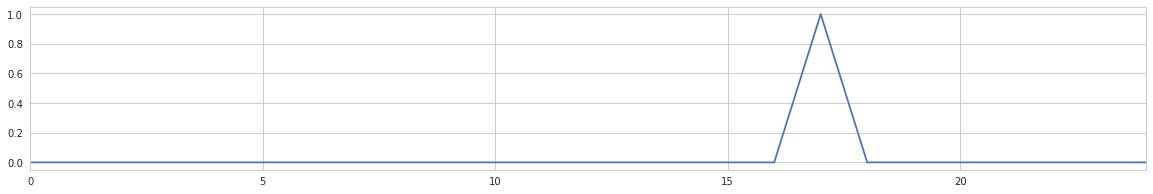

In [34]:
index = 0
pred_df.loc[index:index+24]['swell'].plot()

In [35]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
0        600 non-null int64
1        600 non-null float64
swell    600 non-null int64
dtypes: float64(1), int64(2)
memory usage: 14.1 KB


In [36]:
test['pred'] = pred_df['swell'].tolist()

In [37]:
index=24
test.iloc[index:index+24].T

hour,2017121007,2017121008,2017121009,2017121010,2017121011,2017121012,2017121013,2017121014,2017121015,2017121016,...,2017121021,2017121022,2017121023,2017121100,2017121101,2017121102,2017121103,2017121104,2017121105,2017121106
index,34464.0,34465.0,34466.0,34467.0,34468.0,34469.0,34470.0,34471.0,34472.0,34473.0,...,34478.0,34479.0,34480.0,34481.0,34482.0,34483.0,34484.0,34485.0,34486.0,34487.0
21229_파주기(sec),6.4,4.6,4.6,4.6,5.8,5.8,4.9,4.9,5.3,5.8,...,5.8,6.4,6.4,5.8,7.1,8.0,8.0,8.0,9.1,9.1
22105_파주기(sec),6.4,5.8,5.3,3.6,3.4,4.3,4.3,4.6,4.9,4.6,...,4.9,4.9,5.3,7.1,8.0,8.0,7.1,8.0,8.0,8.0
22106_파주기(sec),6.4,6.4,5.8,3.4,3.6,3.8,3.6,4.0,4.0,3.6,...,3.8,4.0,4.3,4.9,4.6,4.3,4.6,4.9,4.9,4.9
swell(t+1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
eval_metric = evaluation(df['swell(t+1)'].apply(output_change))

In [39]:
scores = []
for day in range(25):
    st = day*24
    print(st)
    scores.append(eval_metric.evaluate(test['pred'][st:st + 24]))

print(scores)

0
 1    23
-1     1
dtype: int64
24
1    24
dtype: int64
48
 1    23
-1     1
dtype: int64
72
1    24
dtype: int64
96
-2    12
 1    12
dtype: int64
120
1    24
dtype: int64
144
 2    18
 0     3
-1     3
dtype: int64
168
 2    15
 0     7
 1     1
-2     1
dtype: int64
192
2    21
0     3
dtype: int64
216
1    24
dtype: int64
240
 1    16
-1     8
dtype: int64
264
2    22
0     2
dtype: int64
288
-1    15
 1     9
dtype: int64
312
 1    22
-1     2
dtype: int64
336
 1    23
-1     1
dtype: int64
360
1    24
dtype: int64
384
2    19
0     5
dtype: int64
408
1    24
dtype: int64
432
2    18
0     4
1     2
dtype: int64
456
 1    23
-1     1
dtype: int64
480
 1    12
-1    12
dtype: int64
504
2    11
1    11
0     2
dtype: int64
528
2    20
0     3
1     1
dtype: int64
552
1    24
dtype: int64
576
-2    21
 1     3
dtype: int64
[22, 24, 22, 24, -12, 24, 33, 29, 42, 24, 8, 44, -6, 20, 22, 24, 38, 24, 38, 22, 0, 33, 41, 24, -39]


In [40]:
np.sum(scores)

525